The Reinforcement Learning Algorithm implemented in this Assignment is PPO, Proximal Policy Optimization with CNN, Convolutional Neural Network Policy

In [2]:
#pip install gym_super_mario_bros==7.3.0 nes_py

In [8]:
#Import the game
import gym_super_mario_bros
#import the joypad wrapper
from nes_py.wrappers import JoypadSpace
#Import thje SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [9]:
#sIMPLE ACTIONS is a libraary that simplifies the actions that the ai can take to make it less complicated
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [10]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')# setup which emulatiuon version to use https://github.com/Kautenja/gym-super-mario-bros
#env.action_space
env = JoypadSpace(env,SIMPLE_MOVEMENT)#SIMPLIFY THE NUMBER OF ACTIONS the ai can take from 256 to 7
#env.action_space#tells the number of actions available

#observation space shows what output the game returns,  i.e the number of pixles in a frame of the game
env.observation_space.shape


(240, 256, 3)

In [11]:
# #create a flag for restarting the game
# done = True
# for frame in range(100000): # for every frame of the game
#     if done:#if the game isnt started we start if via  start =  True
#         env.reset()#resets game environment to start
#     state, reward, done, info = env.step(env.action_space.sample())#parses a random action to the game
#     env.render()#this shows the game on the screen
# env.close()# this runs the game

In [12]:
#prints random actions from the simple movement function
#SIMPLE_MOVEMENT[env.action_space.sample()]
#prints a random number from the action_ space
#env.action_space.sample()
#Shows all available movements
#SIMPLE_MOVEMENT
#state = env.reset()#returns a state showing a particular frame from the game
#env.step(1)[1] #shoes the rewards for eah step
#based on the youtube tutorial Build an Mario AI Model with Python

In [13]:
#nstall pytorch https://pytorch.org/get-started/locally/
#!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

In [14]:
#install stable baselines AI library https://stable-baselines3.readthedocs.io/en/master/guide/install.html
#!pip install stable-baselines3[extra]

In [15]:
#Preprocessing the environment for AI training
#import frame stacker Wrapper and Grayscaling Wrapper
from gym.wrappers import GrayScaleObservation # allows us to capture multiple frame while playing the game
#Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv #converts the game into grayscale to cut down information
#Import Matplotlib
from matplotlib import pyplot as plt

In [16]:
# 1. create the base environment
#the AI library i will use is the Stable Baselines 

env = gym_super_mario_bros.make('SuperMarioBros-v0')# setup which emulatiuon version to use https://github.com/Kautenja/gym-super-mario-bros
# 2. simplify the controls
env = JoypadSpace(env,SIMPLE_MOVEMENT)#SIMPLIFY THE NUMBER OF ACTIONS the ai can take from 256 to 7
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)# required to keep the last dimention which determins colour to do frame stacking
# 4. Wrap inside dummy environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last') #by parsing the env to the frame stack we can specify how many frames to stack, last argument specifies where the rgb channel is, 

In [17]:
state = env.reset()


In [18]:
state, reward, done, info = env.step([env.action_space.sample()])#parses a random action to the game, this has to be in an array because the environment is now vectorised

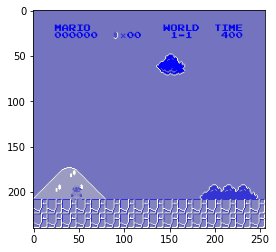

In [19]:
plt.imshow(state[0])#show the frame in colored form before processing

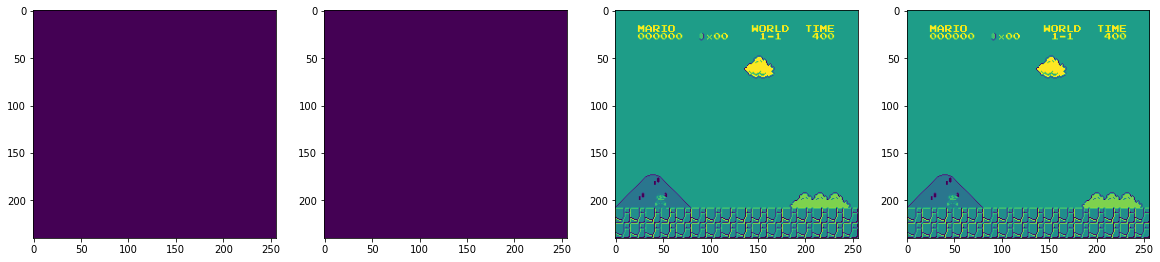

In [20]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

In [21]:
#Train the RL Model
#Import os for file path management
import os
#import PPO for algos
from stable_baselines3 import PPO
#import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [22]:
# Create a class to save models after x amount of steps
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):#check frequency, how often to save the model, save_path, where to save the model
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [23]:
CHECKPOINT_DIR = '../../../train/'#CREATE THESE ON THE DESKTOP IF THE GIT REPO IS CLONES ON THE DESKTOP
LOG_DIR = '../../..//logs/'
print(os.getcwd())

C:\Users\Computing\Desktop\MSc-Robotics-and-Autonomous-Systems\Advanced Machine Learning\Assignment Task 2


In [24]:
#Setup callback Saves the model every 10,thousand steps at the desired location
callback = TrainAndLoggingCallback(check_freq=1000,save_path=CHECKPOINT_DIR)

In [25]:
#CREATING AN AI MODEL
#Setup the MODEL: Machine learning/Deep Learning/ Reinforcement Learning, Ai model
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001,n_steps=512)#using the CNN cLassifier, tensorboard allows us to see how the training is performing, learning rate determines how fast the ai is learning
#n_steps is how many frames to wait per game before updating the neural network

Using cuda device
Wrapping the env in a VecTransposeImage.


In [26]:
#Train the AI model, this is where it starts to learn ,  how many frames the AI sees for every single game
model.learn(total_timesteps=1000000,callback=callback) # can remove callback to prevent saving the data

#LOSS should be going down and explained_variance should be going up

Logging to ../../..//logs/PPO_1


C:\Users\Computing\AppData\Local\Programs\Python\Python310\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 78  |
|    iterations      | 1   |
|    time_elapsed    | 6   |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 78            |
|    iterations           | 2             |
|    time_elapsed         | 13            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 7.4973796e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.000133      |
|    learning_rate        | 1e-06         |
|    loss                 | 183           |
|    n_updates            | 10            |
|    policy_gradient_loss | -4.16e-05     |
|    value_loss           | 441           |
-------------------------------------------
-----

KeyboardInterrupt: 

In [29]:
model.save('../../../mario_testmodel')

In [30]:
#Test out the model


# Load model
model = PPO.load('../../../train/best_model_51000')



In [31]:
state = env.reset()

In [32]:
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()



C:\Users\Computing\AppData\Local\Programs\Python\Python310\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


KeyboardInterrupt: 

#Run this code in the logs/PPO_1 To see performance metrics via tensorboard if it is installed

tensorboard --logdir=.

In [1]:
#Close the program if it still persits
env.close()

NameError: name 'env' is not defined